In [1]:
from local_tree_decomp import *
from help_functions import *

from local_hom_count_best import *
from local_hom_count_best_parallel import *


In [2]:
def get_colours(n, k):
    return [i for i in range(k) for _ in range(n)]

In [3]:
graph = graphs.CompleteBipartiteGraph(2, 4)
graph_clr = [0, 1, 1]

square = graphs.Grid2dGraph(2, 2)
square.relabel()
square_clr = [0, 1, 1, 0]

three_grid = graphs.Grid2dGraph(3, 3)
three_grid.relabel()
three_grid_clr = get_colours(3, 3)

four_grid = graphs.Grid2dGraph(4, 4)
four_grid.relabel()
four_grid_clr = get_colours(4, 4)

four_path = graphs.PathGraph(20)
target_clr = [0, 1, 2, 3]

petersen = graphs.PetersenGraph()

H = graphs.RandomGNP(100, 0.52, seed=42)

# %prun counter.count_homomorphisms_best()

# colour_counter = GraphHomomorphismCounter(square, three_grid, 2, square_clr, three_grid_clr, colourful=True)
# colourful_count = colour_counter.count_homomorphisms_best()
# print(colourful_count)

In [4]:
counter = GraphHomomorphismCounter(graph, H)

%prun counter.count_homomorphisms_best()

         32003895 function calls (32003883 primitive calls) in 41.157 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  5020200   11.077    0.000   24.601    0.000 help_functions.py:59(is_valid_mapping)
        9   10.436    1.160   38.561    4.285 local_hom_count_best.py:183(_add_intro_node_best)
 11599000    6.887    0.000    6.887    0.000 help_functions.py:67(<genexpr>)
  5020203    4.388    0.000   10.123    0.000 {built-in method builtins.all}
  5071330    3.094    0.000    3.118    0.000 generic_graph.py:11306(vertex_iterator)
  5020293    2.251    0.000    2.251    0.000 {built-in method builtins.isinstance}
        6    2.241    0.373    2.290    0.382 local_hom_count_best.py:273(_add_forget_node_best)
        1    0.306    0.306    0.306    0.306 local_hom_count_best.py:321(<listcomp>)
        9    0.148    0.016    0.179    0.020 generic_graph.py:1900(adjacency_matrix)
    90303    0.103    0.000    0.103    0.00

In [29]:
par_counter = ParallelGraphHomomorphismCounter(graph, H)
par_count = par_counter.count_homomorphisms_parallel()
par_count.compute()

array([6.84214408e+09])

In [27]:
counter = GraphHomomorphismCounter(graph, H)
# count = counter.count_homomorphisms_best()
# print(count)

# %timeit -r 3 counter.count_homomorphisms_best()

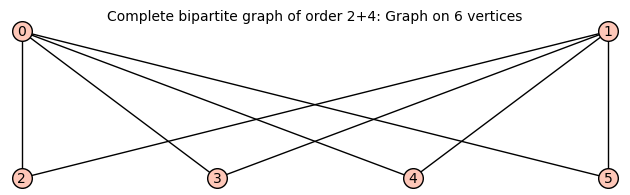

In [6]:
graph

In [7]:
counter.DP_table

[[42497300],
 [2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865,
  2124865],
 [130321,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  130321,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  130321,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  130321,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  104976,
  1049

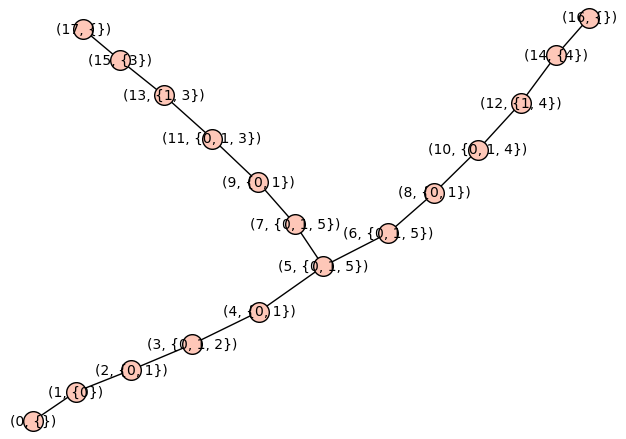

In [8]:
counter.nice_tree_decomp.plot()

In [4]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:51261/status,
Dashboard: http://127.0.0.1:51261/status,Workers: 4
Total threads: 4,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51262,Workers: 4
Dashboard: http://127.0.0.1:51261/status,Total threads: 4
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:51277,Total threads: 1
Dashboard: http://127.0.0.1:51281/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:51265,


In [4]:
def best_speed_test(graph, target_graph, graph_clr, target_clr):
    # best_result = count_homomorphisms_best(graph, target_graph)
    # best_colour_result = count_homomorphisms_best_colour(graph, target_graph, graph_clr, target_clr)

    counter = GraphHomomorphismCounter(graph, target_graph)
    parallel_counter = ParallelGraphHomomorphismCounter(graph, target_graph)

    # print("Mono result:", counter.count_homomorphisms_best())
    # print("Colourful result:", colorful_counter.count_homomorphisms_best())

    print('\nSequential time:')
    %timeit -r 3 counter.count_homomorphisms_best()

    print('Parallel time:')
    par_count = parallel_counter.count_homomorphisms_parallel()
    %timeit -r 3 par_count.compute()


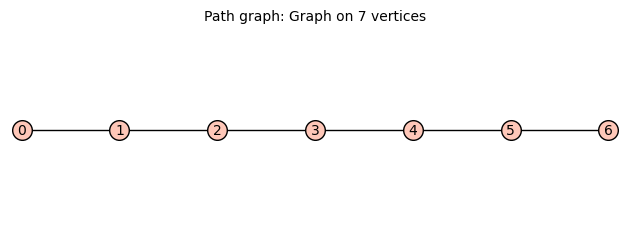

In [10]:
G

In [15]:
import random

# G = graphs.PathGraph(7)

for i in range(1, 41):
    N = i * 20
    H = graphs.RandomGNP(N, 0.52, seed=42)
    # H_color = [random.randint(0, 2) for _ in range(N)]
    print('N: ', N)
    best_speed_test(graph, H, None, None)
    print()


N:  20

Sequential time:
860 ms ± 99.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Parallel time:
705 ms ± 28.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)

N:  40

Sequential time:
10.5 s ± 148 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Parallel time:
10.3 s ± 207 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)

N:  60

Sequential time:


KeyboardInterrupt: 

In [90]:
# graph = graphs.CompleteBipartiteGraph(1, 2)
# random_graph = graphs.RandomGNP(20, 0.6, seed=42)

# counter = GraphHomomorphismCounter(graph, random_graph)
# count = counter.count_homomorphisms_best()
# print(count)

complete = graphs.CompleteGraph(9)
complete_clr = get_colours(3, 3)

counter = GraphHomomorphismCounter(three_grid, complete, 0, three_grid_clr, complete_clr, colourful=True)
print(counter.count_homomorphisms_best())

# %prun counter.count_homomorphisms_best()

1728
 

         132572 function calls in 0.201 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       17    0.064    0.004    0.173    0.010 local_hom_count_best.py:139(_add_intro_node_best)
    54062    0.028    0.000    0.030    0.000 generic_graph.py:11306(vertex_iterator)
    10539    0.024    0.000    0.060    0.000 help_functions.py:59(is_valid_mapping)
    25335    0.017    0.000    0.017    0.000 help_functions.py:67(<genexpr>)
        9    0.014    0.002    0.024    0.003 local_hom_count_best.py:229(_add_forget_node_best)
    10539    0.013    0.000    0.029    0.000 {built-in method builtins.all}
     3513    0.007    0.000    0.010    0.000 local_hom_count_best.py:200(<listcomp>)
     5386    0.006    0.000    0.006    0.000 help_functions.py:91(add_vertex_into_mapping)
    10577    0.006    0.000    0.006    0.000 {built-in method builtins.isinstance}
        2    0.003    0.002    0.003    0.002 local_hom_count_best.p

In [ ]:
%load_ext line_profiler

from local_hom_count_best import count_homomorphisms_best

%lprun -f count_homomorphisms_best(graph, target_graph)

In [4]:
g = graph

tree_decomp = g.treewidth(certificate=True)
nice_tree_decomp = make_nice_tree_decomposition(g, tree_decomp)
root = sorted(nice_tree_decomp)[0]
dir_labelled_TD = label_nice_tree_decomposition(nice_tree_decomp, root, directed=True)

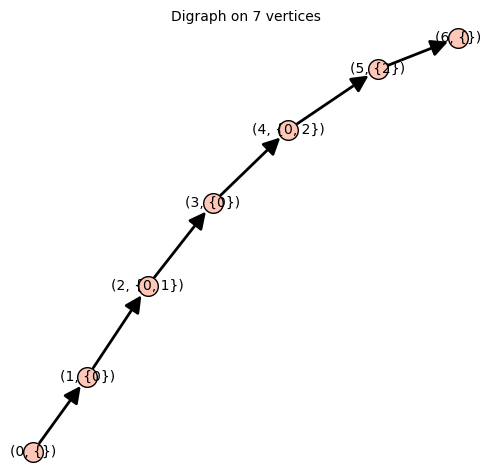

In [7]:
dir_labelled_TD

In [6]:
node_changes(dir_labelled_TD)

{0: 0, 1: 1, 2: 1, 3: 2, 4: 0, 5: 2}

In [4]:
# colour_counter = GraphHomomorphismCounter(graph, target_graph, 2, graph_clr, target_clr, colourful=True)
# colourful_count = colour_counter.count_homomorphisms_best()
# print(colourful_count)

import random
random.seed(int(42))

graph = graphs.CompleteBipartiteGraph(1, 2)
graph_clr = [0, 1, 1]

# target_graph = graphs.CompleteGraph(3)
# target_clr = [0, 1, 2]

for i in range(1, 21):
    N = i * 5
    random_graph = graphs.RandomGNP(N, 0.5, seed=42)
    random_clr = [random.randint(0, 1) for _ in range(N)]
    print('N: ', N)
    best_speed_test(graph, random_graph, graph_clr, random_clr)
    print()

N:  5
Best result:
884 µs ± 94.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Best colour result:
958 µs ± 84.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  10
Best result:
1.65 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Best colour result:
1.04 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  15
Best result:
2.52 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
902 µs ± 43.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  20
Best result:
3.92 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
880 µs ± 34 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  25
Best result:
5.64 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
965 µs ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  30
Best result:
9.02 ms ± 1.02 ms per loop (mean ± std. dev. of 7

KeyboardInterrupt: 

In [ ]:
import random

graph = graphs.CompleteBipartiteGraph(1, 3)
graph_clr = [0, 1, 1, 1]

target_graph = graphs.PetersenGraph()

max_num = 0

for _ in range(500):
    random_clr = [random.randint(0, 1) for _ in range(10)]
    num = count_homomorphisms_best(graph, target_graph, graph_clr, random_clr, colourful=True)
    if num > max_num:
        max_num = num

print(max_num)

In [13]:
graph = graphs.CompleteBipartiteGraph(1, 2)
graph_clr = [0, 1, 1]

random_graph = graphs.RandomGNP(70, 0.5, seed=42)
random_clr = [random.randint(0, 1) for _ in range(N)]

colorful_counter = GraphHomomorphismCounter(graph, random_graph, 2, graph_clr, random_clr, colourful=True)
%mprun colorful_counter.count_homomorphisms_best()

TypeError: 'list' object cannot be interpreted as an integer

In [91]:
def blow_up_graph(original_graph, blow_up_size):
    """
    Create the blow-up of a given graph.
    
    Parameters:
    - original_graph: The original graph to be blown up.
    - blow_up_size: A dictionary mapping each vertex of the original graph to the size of the independent set replacing it.
    
    Returns:
    - A SageMath graph representing the blow-up of the original graph.
    """
    # Create an empty graph for the blow-up
    blow_up = Graph()
    
    # Step 1: Replace each vertex with an independent set
    vertex_map = {}  # Maps original vertex to the list of new vertices in the independent set
    for v in original_graph.vertices():
        new_vertices = [f'{v}_{i}' for i in range(blow_up_size[v])]
        blow_up.add_vertices(new_vertices)
        vertex_map[v] = new_vertices
    
    # Step 2: Connect the vertices between independent sets
    for u, v in original_graph.edges(labels=False):
        for new_u in vertex_map[u]:
            for new_v in vertex_map[v]:
                blow_up.add_edge(new_u, new_v)
    
    return blow_up


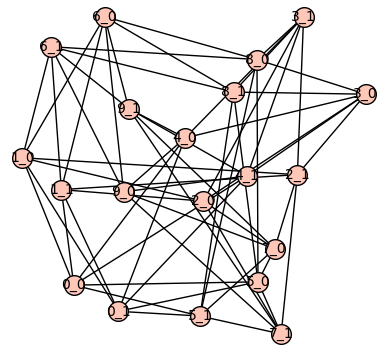

In [92]:
# Define the original graph
G = graphs.PetersenGraph()

# Define the blow-up sizes for each vertex
blow_up_sizes = {v: 2 for v in G.vertices()}  # Replace each vertex with an independent set of size 2

# Create the blow-up graph
blown_up_graph = blow_up_graph(G, blow_up_sizes)

# Show the blown-up graph
blown_up_graph.show()


In [93]:
def blow_up_graph_simple(original_graph, set_size):
    """
    Create the blow-up of a given graph with uniform independent set sizes.
    
    Parameters:
    - original_graph: The original graph to be blown up.
    - set_size: The uniform size of the independent set that replaces each vertex.
    
    Returns:
    - A SageMath graph representing the blow-up of the original graph.
    """
    blow_up = Graph()

    # Create a mapping from original vertices to new independent set vertices
    for v in original_graph.vertices():
        for i in range(set_size):
            blow_up.add_vertex(f'{v}_{i}')

    # Connect vertices in the independent sets according to the original graph's edges
    for u, v in original_graph.edges(labels=False):
        for i in range(set_size):
            for j in range(set_size):
                blow_up.add_edge(f'{u}_{i}', f'{v}_{j}')
                
    return blow_up


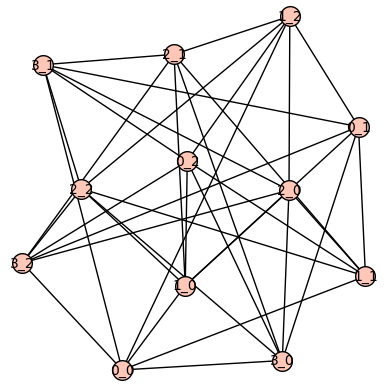

In [95]:
# Define the original graph
G = graphs.CycleGraph(4)  # A simple cycle graph

# Define the uniform size for the independent sets
uniform_set_size = 3  # Replace each vertex with an independent set of size 3

# Create the blow-up graph
blown_up_graph = blow_up_graph_simple(G, uniform_set_size)

# Show the blown-up graph
blown_up_graph.show()


In [9]:
import random

[random.randint(0, 3) for _ in range(10)]

[3, 0, 0, 1, 2, 3, 2, 3, 3, 0]

In [60]:
# %load_ext memory_profiler

import random
from local_hom_count_best import GraphHomomorphismCounter

N = 200
random_graph = graphs.RandomGNP(N, 0.5, seed=42)
random_clr = [random.randint(0, 1) for _ in range(N)]

colour_counter = GraphHomomorphismCounter(square, random_graph, 0, square_clr, random_clr, colourful=True)

colour_counter.count_homomorphisms_best()

6710165

In [61]:
import sys


the_size = sys.getsizeof(colour_counter.DP_table)
print(f"Memory size: {the_size} bytes")

Memory size: 184 bytes


In [62]:
for i in range(len(colour_counter.DP_table)):
    print(zero_density(colour_counter.DP_table[i]))

0.0
0.515
0.874575
0.967236125
0.734775
0.967236125
0.874575
0.515
0.0


In [63]:
flat_zero_density(colour_counter.DP_table)

0.9661881260777492

In [28]:
def zero_density(nums):
    # Count the number of zeros
    zero_count = nums.count(0)
    # Calculate the total number of elements
    total_elements = len(nums)
    # Calculate the density of zeros
    density = zero_count / total_elements if total_elements > 0 else 0
    return density


0.42857142857142855


In [37]:
def flat_zero_density(list_of_lists):
    # Flatten the list of lists into a single list
    flattened_list = [item for sublist in list_of_lists for item in sublist]
    # Count the number of zeros
    zero_count = flattened_list.count(0)
    # Calculate the total number of elements
    total_elements = len(flattened_list)
    # Calculate the density of zeros
    density = zero_count / total_elements if total_elements > 0 else 0
    return density


0.5


In [11]:
import dask.array as da

arr = [1, 2, 3, 4]
da.from_array(arr).compute()[0]

1

In [8]:
L = 5000000

%timeit -r 5 [0 for _ in range(L)]

2.85 s ± 26.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [12]:
%timeit -r 5 [0] * L

30.3 ms ± 1.77 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [11]:
[0] * 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]